### Work 1

In [26]:
from sklearn import preprocessing
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
import seaborn as sns


cols = {} 
cols["biospecimen"] = ["PATNO", "CLINICAL_EVENT","TYPE", "TESTNAME", "TESTVALUE", "UNITS"]
biospecimen = pd.read_csv("~/health data/project 1/data/Biospecimen_Analysis_Results.csv", index_col=["PATNO"], usecols=cols["biospecimen"])
biospecimen["CLINICAL_EVENT"].replace(['Baseline Collection', 'Screening Visit', 'Visit 01', 'Visit 02', 'Visit 03', 'Visit 04', 'Visit 05', 'Visit 06', 'Visit 07', 'Visit 08', 'Visit 09', 'Visit 10', 'Visit 11'],                             ['BL', 'SC', 'V01', 'V02', 'V03', 'V04', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12'], inplace=True)
biospecimen.rename(columns={'CLINICAL_EVENT':'EVENT_ID'}, inplace=True)
M_label_PD_HC = pd.read_csv("C:\\Users\\Vipul Satone\\health data\\project 1\\random data/M_label_PD_HC.csv", index_col = ['PATNO'])




### ploting distribution of different test across visits

#### There is a severe disproportnate distribution across the 4 visits.
#### Furthermore, there are some test which has been done ony on few people ex- 70 to 101 in the graph

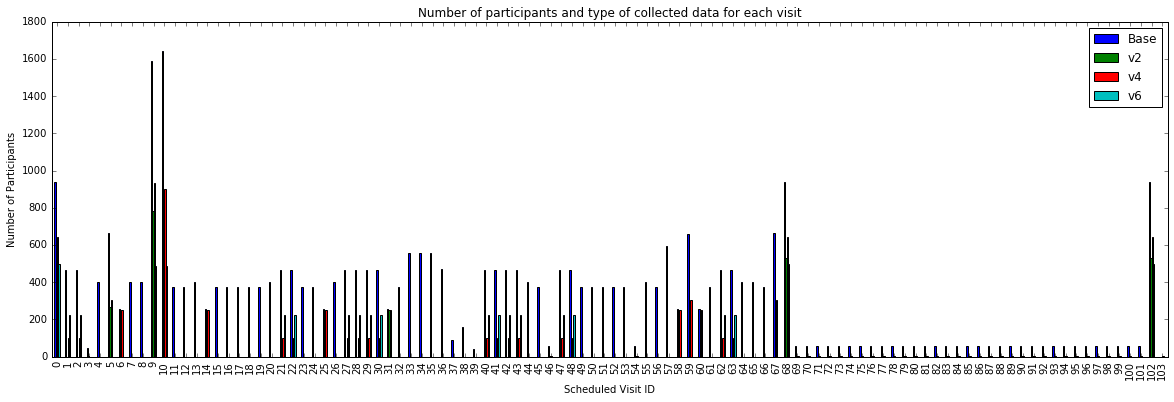

In [27]:
serum1 = biospecimen[["EVENT_ID", "TESTNAME", "TESTVALUE"]]
serum_list = list(serum1.TESTNAME.unique())
l1 = serum_list[0:20]
serum1 = serum1[serum1.EVENT_ID == 'BL' ]
serum1 = serum1[serum1.TESTNAME.isin(serum_list)]
serum1.shape
a_bl = serum1
a = a_bl.reset_index().groupby('TESTNAME').size().reset_index().rename(columns={0:'Base'})


serum1 = biospecimen[["EVENT_ID", "TESTNAME", "TESTVALUE"]]
serum_list = list(serum1.TESTNAME.unique())
l1 = serum_list[0:20]
serum1 = serum1[serum1.EVENT_ID == 'V02' ]
serum1 = serum1[serum1.TESTNAME.isin(serum_list)]
serum1.shape
a_V02 = serum1
b = a_V02.reset_index().groupby('TESTNAME').size().reset_index().rename(columns={0:'v2'})


serum1 = biospecimen[["EVENT_ID", "TESTNAME", "TESTVALUE"]]
serum_list = list(serum1.TESTNAME.unique())
l1 = serum_list[0:20]
serum1 = serum1[serum1.EVENT_ID == 'V04' ]
serum1 = serum1[serum1.TESTNAME.isin(serum_list)]
serum1.shape
a_V04 = serum1
c = a_V04.reset_index().groupby('TESTNAME').size().reset_index().rename(columns={0:'v4'})


serum1 = biospecimen[["EVENT_ID", "TESTNAME", "TESTVALUE"]]
serum_list = list(serum1.TESTNAME.unique())
l1 = serum_list[0:20]
serum1 = serum1[serum1.EVENT_ID == 'V06' ]
serum1 = serum1[serum1.TESTNAME.isin(serum_list)]
serum1.shape
a_V06 = serum1
d = a_V06.reset_index().groupby('TESTNAME').size().reset_index().rename(columns={0:'v6'})


plot = a.merge(b, on='TESTNAME', how='outer').merge(c, on='TESTNAME', how='outer').merge(d, on='TESTNAME', how='outer')\
    .plot(kind='bar', title="Number of participants and type of collected data for each visit", figsize=(20, 6))
plot.set_ylabel("Number of Participants");
plot.set_xlabel("Scheduled Visit ID");



#### For this initial analysis I have consoidered only Bl and Visit 2

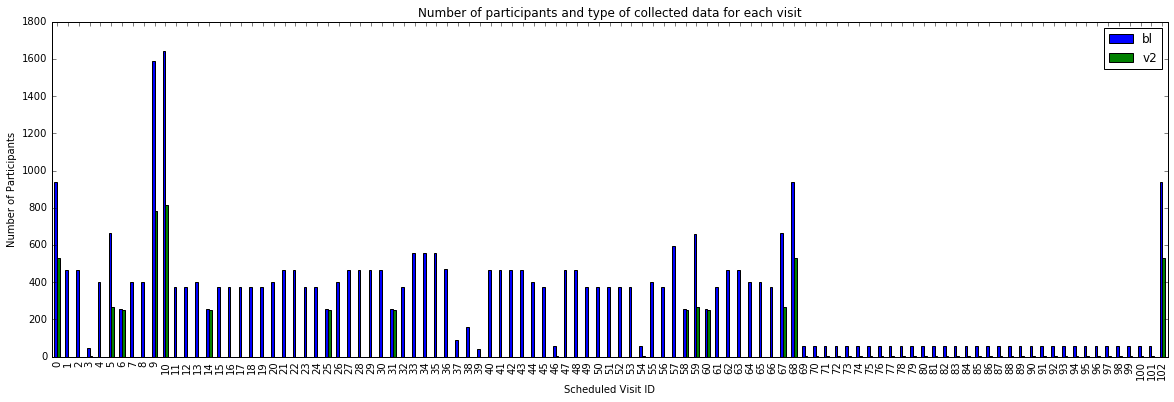

In [28]:
serum1 = biospecimen[["EVENT_ID", "TESTNAME", "TESTVALUE"]]
serumbl = serum1[serum1.EVENT_ID == 'BL']
a_BL = serumbl
a = a_BL.reset_index().groupby('TESTNAME').size().reset_index().rename(columns={0:'bl'})

serum1 = biospecimen[["EVENT_ID", "TESTNAME", "TESTVALUE"]]
serumv2 = serum1[serum1.EVENT_ID == 'V02']
a_v02 = serumv2
b = a_v02.reset_index().groupby('TESTNAME').size().reset_index().rename(columns={0:'v2'})

plot = a.merge(b, on='TESTNAME', how='outer')\
    .plot(kind='bar', title="Number of participants and type of collected data for each visit", figsize=(20, 6))
plot.set_ylabel("Number of Participants");
plot.set_xlabel("Scheduled Visit ID");

### I took only the tests whuch occours between both bl and visit2 ( union )

#### As seen from the graph test from index 16 to 48 will be use less

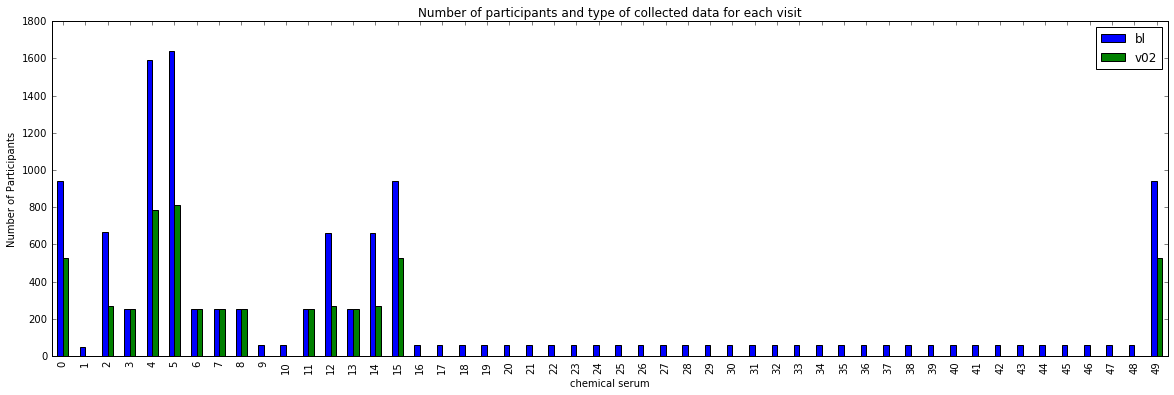

In [29]:

commom = list(set(b.TESTNAME.unique()).intersection(a.TESTNAME.unique()))

serumbl = serumbl[serumbl.TESTNAME.isin(commom)]
a_BL = serumbl
a = a_BL.reset_index().groupby('TESTNAME').size().reset_index().rename(columns={0:'bl'})

serumv2 = serumv2[serumv2.TESTNAME.isin(commom)]
a_v02 = serumv2
b = a_v02.reset_index().groupby('TESTNAME').size().reset_index().rename(columns={0:'v02'})


plot = a.merge(b, on='TESTNAME', how='outer')\
    .plot(kind='bar', title="Number of participants and type of collected data for each visit", figsize=(20, 6))
plot.set_ylabel("Number of Participants");
plot.set_xlabel("chemical serum");


### Now taking the values whic occours atleast 200 times in bl and visit 2

#### as a result we have 500 observations with 29 features 

In [30]:

bl_serums = list((a[a.bl >= 200]).TESTNAME.unique())
V2_serums = list((b[b.v02 >= 200]).TESTNAME.unique())

serum1 = biospecimen[["EVENT_ID", "TESTNAME", "TESTVALUE"]]
a1 = pd.DataFrame(serum1.reset_index().set_index(['PATNO',"TESTNAME", "EVENT_ID"])\
                 .sort_index(level='PATNO'))
a22 = a1[~a1.index.duplicated()]
a3 = a22.unstack(level = [-1,-2])

base = pd.DataFrame(a3.T.sort_index(level="TESTNAME").T)
base = base.loc[:, base.columns.get_level_values(1).isin(['BL'])]
base = base.loc[:, base.columns.get_level_values(2).isin(bl_serums)]



visit2 = pd.DataFrame(a3.T.sort_index(level="TESTNAME").T)
visit2 = visit2.loc[:, visit2.columns.get_level_values(1).isin(['V02'])]
visit2 = visit2.loc[:, visit2.columns.get_level_values(2).isin(V2_serums)]


aaaa = visit2.merge(base,left_index=True,right_index=True, how='outer')


aaaa = aaaa.merge(M_label_PD_HC,left_index=True,right_index=True, how='outer')

filt = list(aaaa.GMM.unique()) 
del filt[3]
aaaa = aaaa[aaaa.GMM.isin(filt)]


aaaa.shape


C:\Anaconda3\lib\site-packages\pandas\tools\merge.py:205: UserWarning: merging between different levels can give an unintended result (3 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


(500, 29)

#### Checking the NANs in teh data

#### for some features there are around 280 missing values out of 500
#### out of 500 observations this test was run on only 200 people

In [31]:
aaaa.isnull().sum()

(TESTVALUE, V02, ABeta 1-42)             165
(TESTVALUE, V02, Abeta 42)               288
(TESTVALUE, V02, Apolipoprotein A1)      286
(TESTVALUE, V02, CSF Alpha-synuclein)    151
(TESTVALUE, V02, CSF Hemoglobin)         150
(TESTVALUE, V02, EGF ELISA)              286
(TESTVALUE, V02, HDL)                    286
(TESTVALUE, V02, LDL)                    286
(TESTVALUE, V02, Total Cholesterol)      286
(TESTVALUE, V02, Total tau)              288
(TESTVALUE, V02, Triglycerides)          286
(TESTVALUE, V02, p-Tau181P)              288
(TESTVALUE, V02, pTau)                   158
(TESTVALUE, V02, tTau)                   158
(TESTVALUE, BL, ABeta 1-42)               26
(TESTVALUE, BL, Abeta 42)                 13
(TESTVALUE, BL, Apolipoprotein A1)       284
(TESTVALUE, BL, CSF Alpha-synuclein)      12
(TESTVALUE, BL, CSF Hemoglobin)           12
(TESTVALUE, BL, EGF ELISA)               284
(TESTVALUE, BL, HDL)                     284
(TESTVALUE, BL, LDL)                     284
(TESTVALUE

#### out of 29 feature some observations have upt 22 features empty.
#### Similarly, checking how many people have more than 10 features as NAN

#### It turns out that out of 500, 291 people have 11 or more feature values as empty.

In [35]:
#aaaa.isnull().sum(axis = 1)
sa = pd.DataFrame(aaaa.isnull().sum(axis = 1))
sa = sa.sort_values(by=[0],ascending=False)
len(sa[sa.iloc[:,0] > 10])

291

### This is just a trial , But i selected best possible set
#### it reduced the value of observations to "only" 69

In [36]:

ind = {}

for i in range(aaaa.shape[1]):
    ind[i] = list(aaaa[aaaa.iloc[:,i].isnull()].index.values)

def union(a, b):
    """ return the union of two lists """
    return list(set(a) | set(b))

nl = ind[0]
for i in range(aaaa.shape[1]):
    nl = union(nl,ind[i])

nu_mat = np.zeros((len(nl),2))
aaaa.isnull().sum(axis = 1)
aaaa = aaaa.T

for i in range(len(nl)):
    nu_mat[i,1] = aaaa[nl[i]].isnull().sum()
    nu_mat[i,0] = nl[i]
    


nu_mat = pd.DataFrame(nu_mat).sort_values(by=[1],ascending=False)
nu_mat = nu_mat[nu_mat.iloc[:,1] <= 10]


a = list(nu_mat.iloc[:,0])

aa = aaaa.iloc[ :,aaaa.columns.get_level_values(0).isin(a) ]
aa = aa.T
aa.shape

aa.iloc[:,0].unique
aa.iloc[:,0] = aa.iloc[:,0].replace(['>1700'] , [1700])
aa.iloc[:,4].unique()
aa.iloc[:,4] = aa.iloc[:,4].replace(['below detection limit','below', 'above'] , [0,0,2000])
aa.iloc[:,18].unique()
aa.iloc[:,18] = aa.iloc[:,18].replace(['below detection limit'] , [0])
aa.iloc[:,10].unique()
aa.iloc[:,10] = aa.iloc[:,10].replace(['below detection limit','<8'] , [0,8])
aa.iloc[:,12].unique()
aa.iloc[:,12] = aa.iloc[:,12].replace(['<8'] , [8])

aa.iloc[:,-3] = aa.iloc[:,-3].replace(['<8'] , [8])
aa.iloc[:,13].unique()
aa.iloc[:,13] = aa.iloc[:,13].replace(['<80'] , [80])
aa.iloc[:,14].unique()
aa.iloc[:,14] = aa.iloc[:,14].replace(['>1700'] , [1700])



for i in range((aa.shape[1])):
    aa.iloc[:,i] = aa.iloc[:,i].replace([None],[np.nan])

In [37]:
aa.shape

(69, 29)

In [38]:
for i in range(aa.shape[1]):
    try:
        aa.iloc[:,i] = aa.iloc[:,i].astype('float64', errors = 'ignore')
    except:
        pass


aa = aa.interpolate(method='linear', axis=0, limit_direction = 'backward').bfill()
aa.iloc[:,-1] = aa.iloc[:,-1].replace(['HC', 'PD_l','PD_m','PD_h'] , [0,1,2,3])

aa.GMM = aa.GMM.astype("category")
    
aa.iloc[:,:-1] = preprocessing.normalize(aa.iloc[:,:-1], axis = 0)


### I used Random forest to learn feature importance,  eventhough it is not a good choice given the less number of observations

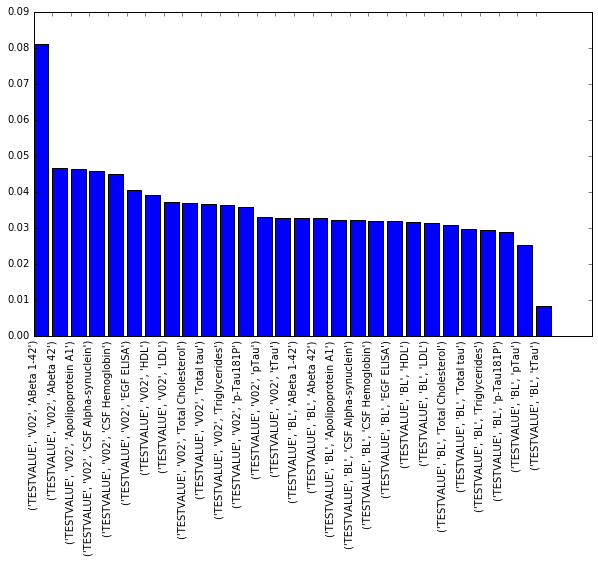

In [39]:

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

X_train = aa.iloc[:,:-1]
Y_train = aa.iloc[:,-1]
'''
X_train = aa.iloc[0:50,:-1]
Y_train = aa.iloc[0:50:,-1]
X_test = aa.iloc[50:,:-1]
Y_test = aa.iloc[50::,-1]
'''

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
ada = RandomForestClassifier(n_estimators = 1000)
ada.fit(X_train, Y_train)
g = pd.DataFrame(np.empty((aa.shape[1]-1,2)))
a = (aa.columns.get_level_values(0))#[:-1]
g.iloc[:,0] = a[:-1]
g.iloc[:,1] = ada.feature_importances_  

g = g.sort_values(by=[1],ascending=False)

plt.figure(figsize=(10,10))
plt.gcf().subplots_adjust(bottom=0.45)
plt.bar(range(g.shape[0]),g.iloc[:,1])
plt.xticks(range(28), a,rotation='vertical')
plt.show()


### All V2 observations are more important than BL.
### so, it makes senses to include as much as visists as possible.
### But, we might not get sufficiet observations.
### Also while imputaion there were isuues with values like "below detection limit", ">1700" etc.
####  how much we set their value will affect the final outcome.

### My focus now is on selecting more number of visists and doing an effective imputation.